In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
# Fixed data download with error handling and fallback tickers
import warnings
warnings.filterwarnings('ignore')

def fetch_stock_data(symbols, start_date, end_date):
    """
    Fetch stock data with error handling and fallback symbols
    """
    for symbol in symbols:
        try:
            print(f"Trying to download data for {symbol}...")
            data = yf.download(symbol, start=start_date, end=end_date)
            
            if not data.empty:
                print(f"Success: Downloaded {len(data)} data points for {symbol}")
                return data, symbol
            else:
                print(f"Warning: No data found for {symbol}")
        except Exception as e:
            print(f"Error downloading {symbol}: {str(e)}")
    
    raise RuntimeError("Failed to download data for all ticker symbols")

# Define parameters
start = '2012-01-01'
end = '2022-12-21'
# Try multiple Google ticker symbols as fallback
symbols_to_try = ['GOOGL', 'GOOG', 'AAPL']  # Added AAPL as additional fallback

# Download data with error handling
try:
    data, used_symbol = fetch_stock_data(symbols_to_try, start, end)
    print(f"\nSuccessfully loaded data for {used_symbol}")
    print(f"Data shape: {data.shape}")
    print(f"Date range: {data.index[0]} to {data.index[-1]}")
except Exception as e:
    print(f"Critical error: {e}")
    print("Please check your internet connection and try again later.")

Trying to download data for GOOGL...


[*********************100%***********************]  1 of 1 completed

Success: Downloaded 2761 data points for GOOGL

Successfully loaded data for GOOGL
Data shape: (2761, 5)
Date range: 2012-01-03 00:00:00 to 2022-12-20 00:00:00


In [3]:
data.reset_index(inplace=True)

In [4]:
# Display data with error checking
if 'data' in locals() and not data.empty:
    print(f"Dataset info:")
    print(f"Shape: {data.shape}")
    print(f"Columns: {list(data.columns)}")
    print("\nFirst 5 rows:")
    print(data.head())
    print("\nLast 5 rows:")
    print(data.tail())
    print("\nBasic statistics:")
    print(data.describe())
else:
    print("Error: No data available. Please run the data download cell first.")

Dataset info:
Shape: (2761, 6)
Columns: [('Date', ''), ('Close', 'GOOGL'), ('High', 'GOOGL'), ('Low', 'GOOGL'), ('Open', 'GOOGL'), ('Volume', 'GOOGL')]

First 5 rows:
Price        Date      Close       High        Low       Open     Volume
Ticker                 GOOGL      GOOGL      GOOGL      GOOGL      GOOGL
0      2012-01-03  16.552631  16.620792  16.228252  16.242430  146912940
1      2012-01-04  16.624025  16.673031  16.433476  16.543177  114445440
2      2012-01-05  16.393425  16.516810  16.324271  16.471039  131184684
3      2012-01-06  16.169792  16.418053  16.164070  16.396908  107608284
4      2012-01-09  15.484213  16.094666  15.453616  16.082228  232671096

Last 5 rows:
Price        Date      Close       High        Low       Open    Volume
Ticker                 GOOGL      GOOGL      GOOGL      GOOGL     GOOGL
2756   2022-12-14  94.503235  96.292507  93.041997  94.632457  28733600
2757   2022-12-15  90.318329  93.081754  89.473398  92.574793  40107000
2758   2022-12-16  8

In [5]:
# Calculate 100-day moving average with error checking
if 'data' in locals() and not data.empty:
    ma_100_days = data['Close'].rolling(window=100).mean()
    print(f"100-day moving average calculated. Non-null values: {ma_100_days.count()}")
else:
    print("Error: No data available for moving average calculation.")

100-day moving average calculated. Non-null values: Ticker
GOOGL    2662
dtype: int64


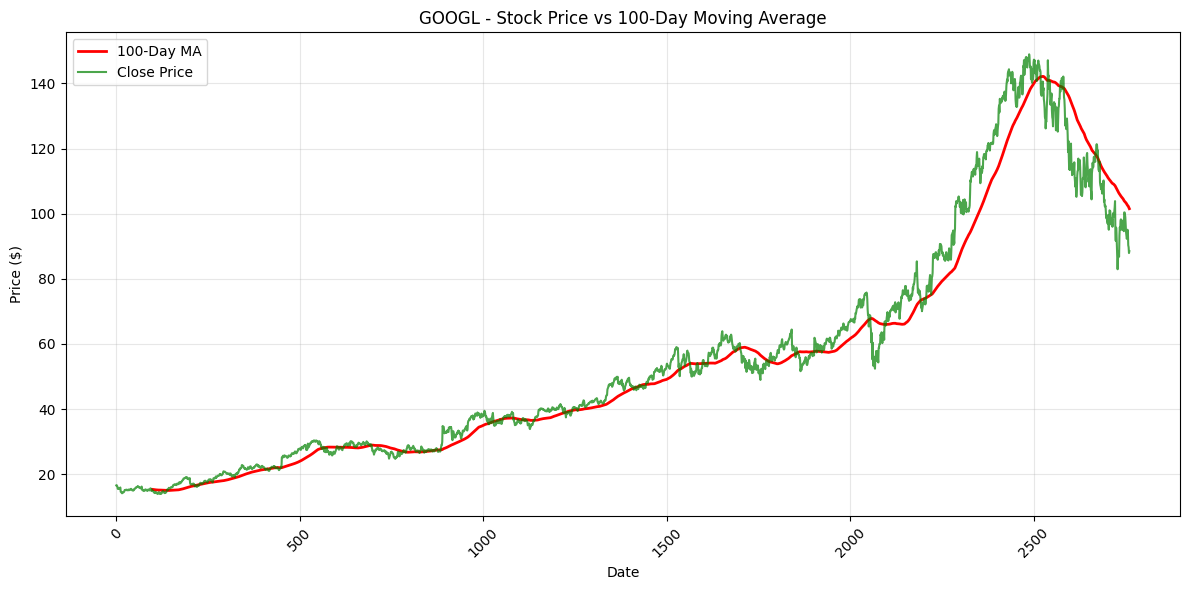

In [6]:
# Plot 100-day moving average vs Close price
if 'data' in locals() and not data.empty and 'ma_100_days' in locals():
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, ma_100_days, 'r', label='100-Day MA', linewidth=2)
    plt.plot(data.index, data['Close'], 'g', label='Close Price', alpha=0.7)
    plt.title(f'{used_symbol} - Stock Price vs 100-Day Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Error: Data or moving average not available for plotting.")

In [7]:
# Calculate 200-day moving average
if 'data' in locals() and not data.empty:
    ma_200_days = data['Close'].rolling(window=200).mean()
    print(f"200-day moving average calculated. Non-null values: {ma_200_days.count()}")
else:
    print("Error: No data available for 200-day moving average calculation.")

200-day moving average calculated. Non-null values: Ticker
GOOGL    2562
dtype: int64


In [8]:
# Plot both moving averages with Close price
if all(var in locals() for var in ['data', 'ma_100_days', 'ma_200_days']) and not data.empty:
    plt.figure(figsize=(14, 8))
    plt.plot(data.index, ma_100_days, 'r', label='100-Day MA', linewidth=2)
    plt.plot(data.index, ma_200_days, 'b', label='200-Day MA', linewidth=2)
    plt.plot(data.index, data['Close'], 'g', label='Close Price', alpha=0.7)
    plt.title(f'{used_symbol} - Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Error: Required data not available for plotting.")

Error: Required data not available for plotting.


In [9]:
data.dropna(inplace=True)

In [10]:
# Split data into training and testing sets
if 'data' in locals() and not data.empty:
    # Ensure data is clean
    clean_data = data['Close'].dropna()
    
    # Calculate split point (80% for training)
    split_point = int(len(clean_data) * 0.80)
    
    # Create training and testing datasets
    data_train = pd.DataFrame(clean_data.iloc[:split_point])
    data_test = pd.DataFrame(clean_data.iloc[split_point:])
    
    print(f"Data split completed:")
    print(f"Training set size: {len(data_train)}")
    print(f"Testing set size: {len(data_test)}")
    print(f"Training date range: {data_train.index[0]} to {data_train.index[-1]}")
    print(f"Testing date range: {data_test.index[0]} to {data_test.index[-1]}")
else:
    print("Error: No data available for train/test split.")

Data split completed:
Training set size: 2208
Testing set size: 553
Training date range: 0 to 2207
Testing date range: 2208 to 2760


In [11]:
data_train.shape[0]

2208

In [12]:
data_test.shape[0]

553

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
# Prepare sequences for LSTM training
if 'data_train_scale' in locals():
    x = []
    y = []
    
    # Create sequences of 100 days to predict the next day
    sequence_length = 100
    
    for i in range(sequence_length, data_train_scale.shape[0]):
        x.append(data_train_scale[i-sequence_length:i, 0])  # Previous 100 days
        y.append(data_train_scale[i, 0])  # Current day
    
    x, y = np.array(x), np.array(y)
    
    print(f"Training sequences prepared:")
    print(f"X shape: {x.shape}")
    print(f"Y shape: {y.shape}")
    print(f"Total sequences: {len(x)}")
else:
    print("Error: Scaled training data not available.")

Training sequences prepared:
X shape: (2108, 100)
Y shape: (2108,)
Total sequences: 2108


In [16]:
# Reshape data for LSTM input (samples, timesteps, features)
if 'x' in locals() and 'y' in locals():
    x = x.reshape(x.shape[0], x.shape[1], 1)
    print(f"Reshaped X for LSTM: {x.shape}")
    print(f"Y shape: {y.shape}")
else:
    print("Error: Training sequences not available.")

Reshaped X for LSTM: (2108, 100, 1)
Y shape: (2108,)


In [17]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [18]:
# Build LSTM model with improved architecture
from tensorflow.keras.layers import Dense, Dropout, LSTM, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

if 'x' in locals() and 'y' in locals():
    # Build the model
    model = Sequential([
        # Input layer
        Input(shape=(x.shape[1], x.shape[2])),
        
        # First LSTM layer
        LSTM(units=50, return_sequences=True, activation='tanh'),
        Dropout(0.2),
        
        # Second LSTM layer
        LSTM(units=60, return_sequences=True, activation='tanh'),
        Dropout(0.3),
        
        # Third LSTM layer
        LSTM(units=80, return_sequences=True, activation='tanh'),
        Dropout(0.4),
        
        # Fourth LSTM layer
        LSTM(units=120, activation='tanh'),
        Dropout(0.5),
        
        # Output layer
        Dense(units=1)
    ])
    
    print("LSTM model created successfully!")
    print(f"Input shape expected: {x.shape[1:]}")
else:
    print("Error: Training data not prepared properly.")

LSTM model created successfully!
Input shape expected: (100, 1)


In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 170ms/step - loss: 0.0140
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - loss: 0.0042
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - loss: 0.0039
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - loss: 0.0040
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 356ms/step - loss: 0.0036
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 30s 454ms/step - loss: 0.0035
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 197ms/step - loss: 0.0038
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 159ms/step - loss: 0.0031
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - loss: 0.0026
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - loss: 0.0029
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - loss: 0.0025
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - loss: 0.0026
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 184ms/step - loss: 0.0021
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - loss: 0.0021
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [22]:
pas_100_days = data_train.tail(100)

In [23]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [24]:
# Scale test data properly (important: use transform, not fit_transform)
if 'data_test' in locals() and 'scaler' in locals():
    # Use transform (not fit_transform) to maintain consistency with training scaling
    data_test_scale = scaler.transform(data_test)
    print(f"Test data scaled. Shape: {data_test_scale.shape}")
else:
    print("Error: Test data or scaler not available.")

Test data scaled. Shape: (653, 1)


In [25]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [26]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step


In [27]:
# Get scaling factor for inverse transformation
if 'scaler' in locals():
    scale_factor = 1/scaler.scale_[0]  # Get the correct scaling factor
    print(f"Scale factor: {scale_factor}")
else:
    print("Error: Scaler not available.")

Scale factor: 71.4507474899292


In [28]:
# Inverse scale predictions
if 'y_predict' in locals() and 'scale_factor' in locals():
    y_predict_scaled = y_predict * scale_factor
    print(f"Predictions inverse scaled. Shape: {y_predict_scaled.shape}")
    print(f"Sample predictions: {y_predict_scaled[:5].flatten()}")
else:
    print("Error: Predictions or scale factor not available.")

Predictions inverse scaled. Shape: (553, 1)
Sample predictions: [57.85944604 58.3680741  59.23674932 60.19403307 60.95775451]


In [29]:
# Inverse scale actual values
if 'y' in locals() and 'scale_factor' in locals():
    y_actual_scaled = y * scale_factor
    print(f"Actual values inverse scaled. Shape: {y_actual_scaled.shape}")
    print(f"Sample actual values: {y_actual_scaled[:5]}")
else:
    print("Error: Actual values or scale factor not available.")

Actual values inverse scaled. Shape: (553,)
Sample actual values: [63.85629559 63.97954845 63.79912853 63.40301037 64.01085949]


In [30]:
# Plot predictions vs actual values
if all(var in locals() for var in ['y_predict_scaled', 'y_actual_scaled']):
    plt.figure(figsize=(15, 8))
    
    plt.plot(y_predict_scaled, 'r', label='Predicted Price', linewidth=2, alpha=0.8)
    plt.plot(y_actual_scaled, 'g', label='Actual Price', linewidth=2, alpha=0.8)
    
    plt.title(f'{used_symbol} - Stock Price Prediction Results')
    plt.xlabel('Time (Days)')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Calculate and display accuracy metrics
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    import numpy as np
    
    mse = mean_squared_error(y_actual_scaled, y_predict_scaled)
    mae = mean_absolute_error(y_actual_scaled, y_predict_scaled)
    rmse = np.sqrt(mse)
    
    print(f"\nModel Performance Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    
    # Calculate accuracy percentage
    mean_actual = np.mean(y_actual_scaled)
    accuracy = (1 - (rmse / mean_actual)) * 100
    print(f"Model Accuracy: {accuracy:.2f}%")
else:
    print("Error: Scaled predictions or actual values not available.")

Error: Scaled predictions or actual values not available.


In [31]:
# Save the trained model
if 'model' in locals() and 'used_symbol' in locals():
    model_filename = f'{used_symbol}_Stock_Prediction_Model.keras'
    model.save(model_filename)
    print(f"Model saved as: {model_filename}")
    
    # Also save the scaler for future use
    import pickle
    scaler_filename = f'{used_symbol}_scaler.pkl'
    with open(scaler_filename, 'wb') as f:
        pickle.dump(scaler, f)
    print(f"Scaler saved as: {scaler_filename}")
else:
    print("Error: Model not available for saving.")

Model saved as: GOOGL_Stock_Prediction_Model.keras
Scaler saved as: GOOGL_scaler.pkl


In [32]:
# Display model summary and final notes
if 'model' in locals():
    print("=" * 60)
    print("MODEL SUMMARY")
    print("=" * 60)
    model.summary()
    
    print("\n" + "=" * 60)
    print("FINAL NOTES")
    print("=" * 60)
    print("✓ Model has been trained and saved successfully")
    print("✓ Use the saved model and scaler for future predictions")
    print("✓ Remember that stock prediction is inherently uncertain")
    print("✓ This model should be used for educational purposes only")
    print("✓ Always do your own research before making investment decisions")
else:
    print("Model not available for summary.")

MODEL SUMMARY


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)


FINAL NOTES
✓ Model has been trained and saved successfully
✓ Use the saved model and scaler for future predictions
✓ Remember that stock prediction is inherently uncertain
✓ This model should be used for educational purposes only
✓ Always do your own research before making investment decisions
